In [565]:
import pandas as pd
df_neut_neg = pd.read_csv('/Users/isabellelorge/Desktop/final_with_preds.csv')

In [584]:
df_neut_neg

,Unnamed: 0,adv_exp,frequencies,predictable,sentences,neutrals,negatives,adv_preds,neutral_preds,adv_preds_base,neutral_preds_base,masked,options
0,0,"(' never', 'acidic')",-21.5117,0,Making something less alkaline does not make ...,is never acidic.,Making something less alkaline does not make i...,"((0, 0.34561452), (8, 0.0015477325), [('not', ...","((12, 0.007036138), (205, 4.774479e-05), [('sl...","((2, 0.22035609), (20, 0.0013778502), [('less'...","((5, 0.065374315), (86, 0.0004458638), [('slig...",Making something less alkaline does not make i...,not/never
1,1,"(' never', 'sure')",-12.6127,0,"And good at everything. But during a hire, y...",is never sure.,"And good at everything. But during a hire, you...","((1, 0.25612512), (0, 0.5358503), [('never', 0...","((1, 0.32667524), (8, 0.0054005664), [('for', ...","((0, 0.71364707), (1, 0.09187564), [('not', 0....","((0, 0.21323885), (27, 0.0035127164), [('not',...","And good at everything. But during a hire, you...",not/never
2,2,"(' never', 'correct')",-15.4777,0,"Shorter Krugman: Ron Paul is amazing, because...",is never correct,"Shorter Krugman: Ron Paul is amazing, because ...","((6, 0.030755248), (7, 0.026887132), [('always...","((0, 0.3613123), (45, 0.0027786), [('not', 0.3...","((1, 0.13765068), (8, 0.030690243), [('always'...","((0, 0.21290855), (68, 0.0019319709), [('not',...","Shorter Krugman: Ron Paul is amazing, because ...",not/never
3,3,"(' never', 'beneficial')",-17.2112,0,I said a policy cannot be racist if it dimini...,is never beneficial.,I said a policy cannot be racist if it diminis...,"((0, 0.44227767), (4, 0.029522445), [('not', 0...","((4, 0.058482464), (158, 0.0003313219), [('con...","((0, 0.499974), (22, 0.0049859025), [('not', 0...","((0, 0.12111336), (94, 0.0009790447), [('not',...",I said a policy cannot be racist if it diminis...,not/never
4,4,"(' never', 'fallacious')",-21.3172,0,"Of course, yes, and I wouldn't be so bold as ...",is never fallacious,"Of course, yes, and I wouldn't be so bold as t...","((0, 0.72410536), (15, 0.0035868143), [('not',...","((0, 0.2568284), (51, 0.0023402239), [('not', ...","((0, 0.27641484), (51, 0.0026323192), [('not',...","((0, 0.18601964), (44, 0.0030972466), [('not',...","Of course, yes, and I wouldn't be so bold as t...",not/never
5,5,"(' never', 'honest')",-17.049,0,"This is pretty damming evidence that her ""res...",is never honest,"This is pretty damming evidence that her ""resp...","((1, 0.119124755), (18, 0.0056688115), [('comp...","((3, 0.058670856), (14, 0.008752606), [('being...","((8, 0.013808249), (23, 0.0041970643), [('comp...","((4, 0.054192644), (15, 0.013637659), [('being...","This is pretty damming evidence that her ""resp...",not/never
6,6,"(' never', 'independent')",-16.0716,0,The province was a Dutch colony until it was ...,is never independent.,The province was a Dutch colony until it was t...,"((4, 0.07360857), (1, 0.09992375), [('then', 0...","((10, 0.015439986), (293, 6.138592e-05), [('po...","((4, 0.05264306), (2, 0.12938964), [('then', 0...","((0, 0.17852105), (86, 0.0012513202), [('not',...",The province was a Dutch colony until it was t...,not/never
7,7,"(' never', 'concrete')",-18.3787,0,This is pseudo science at best. Social scien...,is never concrete.,This is pseudo science at best. Social science...,"((1, 0.1923153), (4, 0.025008967), [('very', 0...","((17, 0.0066945106), (344, 0.00011614747), [('...","((0, 0.37190193), (6, 0.015132895), [('not', 0...","((1, 0.06244297), (196, 0.00044217866), [('rei...",This is pseudo science at best. Social science...,not/never
8,8,"(' never', 'peaceful')",-17.3392,0,"Without nations, there would be no high techn...",is never peaceful.,"Without nations, there would be no high techno...","((0, 0.47453845), (1, 0.054978773), [('not', 0...","((4, 0.029983284), (31, 0.003774589), [('very'...","((0, 0.52329457), (1, 0.081872806), [('not', 0...","((2, 0.057197914), (26, 0.004447417), [('very'...","Without nations, there would be no high techno...",not/nev

In [559]:
# df_backup = pd.read_csv('/Users/isabellelorge/Desktop/final_sentences_backup.csv')

In [578]:
# df_backup['sentences'][df_backup['sentences'].str.contains('quite unseasonable')].iloc[0]

In [577]:
# masked = []
# options = []

# for i, s in df_neut_neg['sentences'].iteritems():
#     print(i)
#     words = s.split()
#     print(words)
#     adv = words[-2]
#     words[-2] = '[MASK]'
#     s1 = ' '.join(words)
#     print(s1)
#     masked.append(s1)
#     options.append(f'not/{adv}')

In [572]:
# df_neut_neg['masked'] = [s for s in masked]
# df_neut_neg['options'] = [o for o in options]

In [573]:
# df_sub = df_neut_neg[['masked', 'options']]

In [576]:
# df_sub.to_csv('/Users/isabellelorge/Desktop/for_raters.csv')

In [385]:
temporal = [' never', 'sometimes', 'already', 'often', 'generally', 'usually', 'frequently','always']
factual = ['maybe',  'perhaps', 'possibly', 'probably', 'actually',  'really', 'certainly', 'definitely']
other = ['hardly', 'slightly', 'basically', 'pretty', 'quite',  'very',  'seriously', 'completely'] 
# swapped 'pretty' and 'quite', as per Taboada et al. (2011) rankings 

deg_adv = temporal + factual + other

In [405]:
df_final = pd.read_csv('/Users/isabellelorge/Desktop/data_in_progress/df_final.csv')

In [445]:
df_final

,Unnamed: 0,author,body,body_cleaned,controversiality,created_utc,distinguished,edited,gilded,id,language,link_id,parent_id,retrieved_on,score,subreddit,subreddit_id
0,0,cA70f,&gt; Then go buy a house on minimum wage.\n\nY...,> then go buy a house on minimum wage . you ar...,0.0,1420077552,NaN,False,0,cnav9t5,en,t3_2qyb7u,t1_cnaue1g,1425122872.0,3,politics,t5_2cneq
1,1,tHuBs,&gt;You are not suppose to buy a house on mini...,> you are not suppose to buy a house on minimu...,0.0,1420103323,NaN,False,0,cnb334s,en,t3_2qyb7u,t1_cnav9t5,1425119136.0,0,politics,t5_2cneq
2,2,6xkmI,"If you look at the last map which was, I think...","if you look at the last map which was , i thin...",0.0,1420140933,NaN,False,0,cnbdye4,en,t3_2r0gag,t1_cnbdo4j,1425114055.0,3,syriancivilwar,t5_2x5s1
3,3,Jesn2,Thinking and questioning causes liberalism.\n\...,thinking and questioning causes liberalism . a...,0.0,1420156659,NaN,False,0,cnblzu2,en,t3_2qzddd,t3_2qzddd,1425110275.0,2,POLITIC,t5_2r84s
4,4,Gx9US,&gt;Profit is based on labor and exploitation ...,> profit is based on labor and exploitation to...,0.0,1420164687,NaN,1420164941,0,cnbq6so,en,t3_2qz9jf,t1_cnbmvwy,1425108026.0,1,socialism,t5_2qjii
5,5,0Fr36,OK! Let's examine this:\n\n&gt; Capitalism is...,ok ! let 's examine this : > capitalism is a s...,0.0,1420253904,NaN,False,0,cncs4js,en,t3_2r39ml,t1_cncax9u,1425089952.0,2,DebateaCommunist,t5_2t9dp
6,6,7sSAK,The correct phrasing is that if their desire t...,the correct phrasing is that if their desire t...,0.0,1420339294,NaN,False,0,cndpkn1,en,t3_2r8qiy,t1_cndjauf,1425072421.0,8,Anarcho_Capitalism,t5_2qorf
7,7,6w7aV,"Uh, they were never true. Jewish people share ...","uh , they were never true . jewish people shar...",0.0,1420510551,NaN,False,0,cnfqrod,en,t3_2rf4va,t1_cnfbn9t,1425037501.0,3,politics,t5_2cneq
8,8,qAOca,&gt;It is the most freeing economic system eve...,> it is the most freeing economic system ever ...,0.0,1420543033,NaN,False,0,cng2l8f,en,t3_2r7hbj,t1_cnfjmhn,1425031876.0,1,Ask_Politics,t5_2t160
9,9,MwrEH,&gt; How? You can't just assert this.\n\nI don...,> how ? you ca n't just assert this . i do n't...,0.0,1420548235,NaN,False,0,cng3ron,en,t3_2r7hbj,t1_cng2l8f,1425031326.0,-1,Ask_Politics,t5_2t160


In [400]:
df_final.columns

Index(['Unnamed: 0', 'author', 'body', 'body_cleaned', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'id', 'language',
       'link_id', 'parent_id', 'retrieved_on', 'score', 'subreddit',
       'subreddit_id'],
      dtype='object')

In [406]:
df_final = df_final.dropna(subset = ['body'])

In [558]:
df_final['body'][df_final['body'].str.contains('slightly miffed')]

Series([], Name: body, dtype: object)

In [529]:
errors = 0
for idx, s in df_neut_neg['sentences'].iteritems():
    print(idx)
    s1 = s.split('.')[0]
    s2 = s.split('.')[1]
    if len(s2.split()) > 3:
#         print(s2)
        try:
            original = df_final['body'][df_final['body'].str.contains(s2.strip())]
            if s1 not in original.iloc[0]:
                print(original.iloc[0])
                if len(original) > 1:
                    print(s2)
#                     sent = [i.strip() for i in original.iloc[0].split('.')]
#                     s2_idx = [i for i, s in enumerate(sent) if s2.strip() in sent[i]][0]
#                     if len(sent) == 1 or s2_idx == 0 or sent[s2_idx-1].strip() == '':
#                         print('ONLY 2d', s2+'.')
# #                             df_neut_neg['sentences'].iloc[idx] = s2 + '.'
#                     else:
#                         print('TWO SENT', re.sub('&gt;|\"|”|org.*\)','', '. '.join(sent[s2_idx-1:s2_idx+1]).strip() + '.'))
# #                             df_neut_neg['sentences'].iloc[idx] = '.'.join(sent[s2_idx-1:s2_idx+1])
                    errors+=1
        except Exception as e:
            print(e)
            

0
1
2
3
4
5
6
7
&gt;Are you an evolutionary biologist?

You don't need to be a physicist to understand the basics of gravity.  You suggested in your previous post that nature universally selects for risk adverse organisms.  That's an untrue statement and you only need a casual interest in evolution to come across an article or two as to why that is.  

&gt;This is pseudo science at best.

Social science is never concrete.  The current consensus about personality is that it is a combination of genetics and environment.  That being the case it's not out of line that we could measure some of the genetic factors.  Now whether these scientist in particular have been able to actually do so is outside of my knowledge base, but it is certainly possible.

&gt;What do we do this bad stud? Start genetic therapy for conservatives?

I don't even have a casual interest in marketing but I would assume the more we know about why people make the choices they do, the better we would be able to influence

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


single positional indexer is out-of-bounds
19
20
single positional indexer is out-of-bounds
21
22
23
24
25
26
27
unterminated character set at position 6
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
single positional indexer is out-of-bounds
50
51
single positional indexer is out-of-bounds
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
single positional indexer is out-of-bounds
83
84
85
single positional indexer is out-of-bounds
86
87
single positional indexer is out-of-bounds
88
89
90
91
92
93
single positional indexer is out-of-bounds
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
single positional indexer is out-of-bounds
112
113
114
115
116
multiple repeat at position 124
117
118
119
120
121
122
123
nothing to repeat at position 0
124
125
126
127
128
129
single positional indexer is out-of-bounds
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
15

243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
single positional indexer is out-of-bounds
265
266
267
268
269
270
271
272
273
274
single positional indexer is out-of-bounds
275
276
277
278
279
280
281
282
283
284
single positional indexer is out-of-bounds
285
286
287
288
289
290
291
292
293
single positional indexer is out-of-bounds
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
single positional indexer is out-of-bounds
309
single positional indexer is out-of-bounds
310
311
312
313
single positional indexer is out-of-bounds
314
315
single positional indexer is out-of-bounds
316
single positional indexer is out-of-bounds
317
I love how the free stuff is always qualified. 

"Everyone has a right to the best quality Healthcare that the system can provide"

This alone should make everyone really worried.
 I love how the free stuff is always qualified
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
33

single positional indexer is out-of-bounds
645
single positional indexer is out-of-bounds
646
single positional indexer is out-of-bounds
647
single positional indexer is out-of-bounds
648
649
650
651
652
653
654
655
656
657
658
single positional indexer is out-of-bounds
659
single positional indexer is out-of-bounds
660
661
single positional indexer is out-of-bounds
662
663
664
single positional indexer is out-of-bounds
665
666
667
668
single positional indexer is out-of-bounds
669
670
671
single positional indexer is out-of-bounds
672
single positional indexer is out-of-bounds
673
674
675
single positional indexer is out-of-bounds
676
single positional indexer is out-of-bounds
677
single positional indexer is out-of-bounds
678
679
680
My dad (and pretty much all of my father's side of the family) were born and raised kibbutzniks. I've been there several times and it is hardly socialistic. The kibbutzim were always this highly militaristic (there are pictures of my dad, age 8, learning

877
single positional indexer is out-of-bounds
878
879
880
881
882
883
single positional indexer is out-of-bounds
884
885
886
single positional indexer is out-of-bounds
887
single positional indexer is out-of-bounds
888
889
nothing to repeat at position 0
890
891
892
893
894
895
896
897
898
single positional indexer is out-of-bounds
899
900
single positional indexer is out-of-bounds
901
902
903
904
905
906
907
908
909
910
911
912
single positional indexer is out-of-bounds
913
single positional indexer is out-of-bounds
914
915
916
917
Circlejerking is a valid point to you? Wow. I am seriously sorry. 
  I am seriously sorry
918
919
920
921
single positional indexer is out-of-bounds
922
923
924
925
single positional indexer is out-of-bounds
926
single positional indexer is out-of-bounds
927
single positional indexer is out-of-bounds
928
929
single positional indexer is out-of-bounds
930
931
932
933
934
935
936
single positional indexer is out-of-bounds
937
938
939
940
941
942
943
944
945


In [564]:
# df_neut_neg.to_csv('/Users/isabellelorge/Desktop/final_with_preds.csv')

In [462]:
errors

223

In [541]:
df_neut_neg.iloc[40:]

,adv_exp,frequencies,predictable,sentences,neutrals,negatives,adv_preds,neutral_preds,adv_preds_base,neutral_preds_base
40,"('sometimes', 'radioactive')",-19.464140,1.0,"I have yet to find the reason for the chems, ...",is sometimes radioactive.,"I have yet to find the reason for the chems, i...","((45, 0.0011043879), (9, 0.012632068), [('even...","((0, 0.5206232), (76, 0.00050426903), [('not',...","((72, 0.0011027369), (62, 0.0013349304), [('ev...","((0, 0.56408495), (61, 0.00032043157), [('not'..."
41,"('sometimes', 'necessary')",-12.435597,1.0,&gt;The move to end US operations at Mildenhal...,is sometimes necessary.,Although I don't understand this sentence: the...,"((2, 0.09009531), (22, 0.0027680972), [('still...","((0, 0.6729886), (76, 0.00052640826), [('not',...","((0, 0.8150883), (15, 0.002316272), [('not', 0...","((0, 0.82982576), (71, 0.0002538983), [('not',..."
42,"('sometimes', 'interesting')",-16.220507,1.0,Reliable Sources probably isn't very incisiv...,is sometimes interesting,Reliable Sources probably isn't very incisive ...,"((98, 0.00029465297), (21, 0.0035235558), [('s...","((7, 0.029222604), (36, 0.0019410521), [('very...","((13, 0.012633107), (35, 0.0022806406), [('sti...","((4, 0.037023317), (61, 0.0009339639), [('very..."
43,"('sometimes', 'vitriolic')",-17.362111,0.0,"As written on their site they are hyperbolic, ...",is sometimes vitriolic.,"As written on their site they are hyperbolic, ...","((11, 0.010588566), (1, 0.22282559), [('often'...","((7, 0.032971162), (19, 0.009387339), [('very'...","((0, 0.18930563), (3, 0.06481758), [('not', 0....","((0, 0.41516462), (43, 0.0018813508), [('not',..."
44,"('sometimes', 'armed')",-16.491970,1.0,and most of the reported self-defense gun uses...,is sometimes armed.,and most of the reported self-defense gun uses...,"((0, 0.37989563), (20, 0.0067914124), [('not',...","((1, 0.15965588), (53, 0.0012859273), [('heavi...","((0, 0.2368068), (128, 0.0006054399), [('not',...","((0, 0.25613597), (100, 0.0004623478), [('not'..."
45,"('sometimes', 'misleading')",-15.108568,1.0,"One, because they are technically true. Two,...",is sometimes misleading.,"One, because they are technically true. Two, t...","((19, 0.012894439), (3, 0.041686162), [('techn...","((3, 0.051365253), (41, 0.0037699316), [('high...","((6, 0.0343817), (13, 0.018330578), [('so', 0....","((7, 0.02952567), (17, 0.01480761), [('highly'..."
46,"('sometimes', 'counterproductive')",-16.437717,1.0,These are characteristics that grassroots mov...,is sometimes counterproductive.,These are characteristics that grassroots move...,"((109, 0.00025501085), (2, 0.13019882), [('ver...","((5, 0.0329476), (75, 0.0023219609), [('also',...","((67, 0.00087353826), (13, 0.014125459), [('ve...","((0, 0.22488415), (38, 0.002619991), [('not', ..."
47,"('sometimes', 'tense')",-15.822551,1.0,From what I understand the Kurds and Iranians...,is sometimes tense,From what I understand the Kurds and Iranians ...,"((11, 0.0073317923), (1, 0.17065072), [('somew...","((7, 0.0015260288), (90, 6.226363e-05), [('pas...","((0, 0.76219594), (1, 0.039256435), [('not', 0...","((10, 0.009479615), (51, 0.0024997357), [('pas..."
48,"('sometimes', 'fun')",-16.275322,1.0,The polls have become fodder for every blogger...,is sometimes fun.,The behavior I exhibit in political threads ar...,"((18, 0.004161136), (39, 0.0015384778), [('als...","((2, 0.07046899), (33, 0.0038076562), [('for',...","((7, 0.028117085), (24, 0.004564674), [('still...","((4, 0.03372421), (157, 0.0006338806), [('more..."
49,"('sometimes', 'paranoid')",-17.271418,1.0,"As an Alabamian, I know what people in the so...",is sometimes paranoid.,"As an Alabamian, I know what people in the sou...","((190, 0.00014601367), (5, 0.04993365), [('eve...","((5, 0.031920016), (93, 0.0011304875), [('very...","((82, 0.00047325576), (1, 0.031559292), [('eve...","((6, 0.026489519), (27, 0.0054429136), [('very..."


In [363]:
import numpy as np
from ast import literal_eval

# for c in ['adv_preds', 'neutral_preds', 'adv_preds_base', 'neutral_preds_base', 'adv_exp']:
#     df_neut_neg[c] = df_neut_neg[c].apply(lambda x: literal_eval(x))

In [440]:
# import re
# for i, s in df_neut_neg['sentences'].iteritems():
#     if s.split()[-2] == 'not':
#         print(s)
#         adv = re.sub("'|\(", '', df_neut_neg['adv_exp'].iloc[i].split(',')[0])
#         s1 = s.split()
#         s1[-2] = adv
#         s1 = " ".join(s1)
#         print(s1)
# #         df_neut_neg['sentences'].iloc[i] = s1
#         print(adv)

In [513]:
for i, s in df_neut_neg['sentences'].iteritems():
    print(s)
    print (df_neut_neg['adv_preds'].iloc[i])

 Making something less alkaline does not make it acidic.  Referring to ocean acidification as if it were possible, or even something that was happening, is not scientific, we can make the ocean less alkaline, maybe, but never acidic.
((0, 0.34561452), (8, 0.0015477325), [('not', 0.34561452), ('more', 0.308264), ('still', 0.2298713), ('less', 0.050772283), ('very', 0.0074112266), ('also', 0.0059852186), ('remain', 0.0031087943), ('rather', 0.0019768162), ('never', 0.0015477325), ('stay', 0.0013996146)])
 And good at everything.  But during a hire, you are never sure.
((1, 0.25612512), (0, 0.5358503), [('never', 0.5358503), ('not', 0.25612512), ('less', 0.05557508), ('always', 0.04099057), ('rarely', 0.015384428), ('more', 0.010159908), ('too', 0.009681929), ('so', 0.008926704), ('very', 0.008861798), ('almost', 0.0050760675)])
 Shorter Krugman: Ron Paul is amazing, because unlike a stopped clock that is at least correct time twice a day, if by accident, Ron Paul is never correct.
((6, 0

((32, 0.00083338574), (9, 0.00822776), [('just', 0.70212865), ('a', 0.064677164), ('working', 0.03161069), ('perfectly', 0.02361817), ('all', 0.019551676), ('doing', 0.018294185), ('going', 0.01618983), ('still', 0.015364005), ('quite', 0.011247848), ('pretty', 0.00822776)])
I really think it'll be emotionally healthy for us.It'll take a while, but hopefully we'll start to realize we as a society are pretty dysfunctional
((0, 0.21716131), (21, 0.010470889), [('not', 0.21716131), ('very', 0.05373356), ('completely', 0.04540814), ('really', 0.033846024), ('basically', 0.028043766), ('all', 0.025495647), ('totally', 0.024853552), ('so', 0.024746485), ('emotionally', 0.02448098), ('truly', 0.024367752)])
 I was curious and went to watch some of it.  Lots of boring stuff but some pretty inspiring.
((80, 0.00049213733), (3, 0.041030794), [('really', 0.32739115), ('very', 0.21993023), ('quite', 0.07338075), ('pretty', 0.041030794), ('super', 0.018332578), ('definitely', 0.01658039), ('was', 0

In [361]:
for idx, i in df_neut_neg['negatives'].iteritems():
    print(df_neut_neg['adv_exp'].iloc[idx])
    print(df_neut_neg['sentences'].iloc[idx])
    print(i)

(' never', 'acidic')
 Making something less alkaline does not make it acidic.  Referring to ocean acidification as if it were possible, or even something that was happening, is not scientific, we can make the ocean less alkaline, maybe, but never acidic.
Making something less alkaline does not make it acidic. Referring to ocean acidification as if it were possible, or even something that was happening, is not scientific, we can make the ocean less alkaline, maybe, but not acidic.
(' never', 'sure')
 And good at everything.  But during a hire, you are never sure.
And good at everything. But during a hire, you are not sure.
(' never', 'correct')
 Shorter Krugman: Ron Paul is amazing, because unlike a stopped clock that is at least correct time twice a day, if by accident, Ron Paul is never correct.
Shorter Krugman: Ron Paul is amazing, because unlike a stopped clock that is at least correct time twice a day, if by accident, Ron Paul is not correct
(' never', 'beneficial')
 I said a polic

If UBI was implemented, I think more apartments would open, causing them to be cheaper overall, meaning I could live on 15k income. Somewhere like NYC, 30k is not minimum.
('probably', 'corrupt')
 He kind of has that "supports the working class" vibe that would help out her image as a shill of the banking industry. The problem is that in spite of his great PR he's been rather ineffective and probably corrupt.
He kind of has that "supports the working class" vibe that would help out her image as a shill of the banking industry. The problem is that in spite of his great PR he's been rather ineffective and not corrupt.
('probably', 'inescapable')
 that academics are expected to serve on and contribute to that run the university.  I agree that these things tend to be somewhat political and bureaucratic, but that is the nature of the beast and probably inescapable.
that academics are expected to serve on and contribute to that run the university. I agree that these things tend to be somewha

Targeting militants is not terrorism. It's challenging enough when it's a family member you love and have long-standing ties to, and I think those who do this kind of work for strangers to not be admirable.
('quite', 'healthy')
 He was 128 days premature (21 weeks and 5 days gestation) and weighed 1 pound 6 ounces (624 g).  He survived and is quite healthy.
He was 128 days premature (21 weeks and 5 days gestation) and weighed 1 pound 6 ounces (624 g). He survived and is not healthy.
('quite', 'disarming')
 Potential criminal violations arise when officials knowingly disseminate documents marked as classified to unauthorized officials or on unclassified systems, or otherwise misuse classified materials.  Having said that, there is something about his manner that is quite disarming.
Potential criminal violations arise when officials knowingly disseminate documents marked as classified to unauthorized officials or on unclassified systems, or otherwise misuse classified materials. Having s

In [ ]:
# examples where BERT gets it clearly wrong (not isn't just above target but top prediction here)
'Fairly certain the charter says exceptions are allowed, and this entire situation is definitely exceptional.'
"First, create a need, then, provide the solution. No, they didn't really make good rational arguments to be afraid, but fear is frequently irrational."
"Doesn't really matter what republicans say, democrats are going to call them racist.  Because what Republicans say is frequently racist."
"My experience in high school made me feel two things.  One, is that teachers were just there for a pay cheque mostly and were only interested in students who were already interested."


In [ ]:
# BUT sometimes when 'not' is above target, the top predictions above not are still similar to target
# BUT the point is that if the context concurs, these should be ranked accordingly, ie, there should
# not be intensifiers randomly spread out on each side of 'not'

In [364]:
other_count = 0
deg_adv_other_not =  ['other'] + deg_adv + ['not']
confusion_matrix = np.zeros((len(deg_adv), len(deg_adv_other_not)))

for idx, p in df_neut_neg['adv_preds'].iteritems():
    adv = df_neut_neg['adv_exp'][idx][0]
#     print(adv)
    adv_idx = deg_adv.index(adv)
    top_10 = p[2]
    print(top_10)
    
    counter = 0
    for i in top_10:
        print(i[0])
        top = i[0]
        if top == 'never':
                top = ' never'
        if top in deg_adv_other_not:
            top_idx = deg_adv_other_not.index(top)
            print(top_idx)

            break
        else:
            counter+=1
            if counter == 10:
                print ('NOT IN LIST!')
                top_idx = 0
                other_count+=1

    confusion_matrix[adv_idx][top_idx] +=1


[('not', 0.34561452), ('more', 0.308264), ('still', 0.2298713), ('less', 0.050772283), ('very', 0.0074112266), ('also', 0.0059852186), ('remain', 0.0031087943), ('rather', 0.0019768162), ('never', 0.0015477325), ('stay', 0.0013996146)]
not
25
[('never', 0.5358503), ('not', 0.25612512), ('less', 0.05557508), ('always', 0.04099057), ('rarely', 0.015384428), ('more', 0.010159908), ('too', 0.009681929), ('so', 0.008926704), ('very', 0.008861798), ('almost', 0.0050760675)]
never
1
[('always', 0.43012193), ('still', 0.08365558), ('absolutely', 0.060201265), ('also', 0.051841926), ('completely', 0.046245463), ('actually', 0.035060443), ('not', 0.030755248), ('never', 0.026887132), ('totally', 0.015138848), ('perfectly', 0.014804863)]
always
8
[('not', 0.44227767), ('always', 0.178867), ('also', 0.03207031), ('mutually', 0.031123744), ('never', 0.029522445), ('politically', 0.024209948), ('very', 0.024116943), ('socially', 0.020756386), ('economically', 0.0152253285), ('only', 0.015103227)]
no

even
probably
12
[('really', 0.2039796), ('even', 0.107726954), ('kinda...', 0.054119516), ('so', 0.05189724), ('very', 0.049565244), ('acts', 0.04915791), ('is', 0.047238465), ('not', 0.036695093), ('almost', 0.033250105)]
really
14
[('so', 0.2573808), ('not', 0.041201394), ('very', 0.03361288), ('suddenly', 0.030697247), ('clearly', 0.027967865), ('getting', 0.027759086), ('deeply', 0.026298247), ('almost', 0.023182109), ('being', 0.021098856), ('just', 0.021092698)]
so
not
25
[('is', 0.8180712), ('was', 0.102185145), ('seems', 0.022672767), ('sounds', 0.0216556), ('means', 0.0044530937), ('looks', 0.002906978), ('sounded', 0.0014968914), ('too', 0.0014540026), ('very', 0.0009899671), ('IS', 0.000941665)]
is
was
seems
sounds
means
looks
sounded
too
very
22
[('but', 0.88460374), ('maybe', 0.038106702), ('very', 0.013657985), ('probably', 0.0069156247), ('not', 0.0059310864), ('no', 0.0056890664), ('too', 0.0044136746), ('however', 0.0039065904), ('definitely', 0.0025165153), ('always'

completely
24
[('really', 0.45172206), ('very', 0.16263436), ('pretty', 0.09578331), ('too', 0.06683221), ('getting', 0.04537022), ('so', 0.025146015), ('quite', 0.015604852), ('fairly', 0.015330473), ('just', 0.013282282), ('centuries', 0.0068807756)]
really
14
[('pretty', 0.3973417), ('very', 0.11279044), ('really', 0.05722689), ('extremely', 0.04335635), ('quite', 0.038875166), ('fairly', 0.024131374), ('rather', 0.02066981), ('incredibly', 0.018097969), ('so', 0.015711827), ('particularly', 0.014448057)]
pretty
21
[('not', 0.29240236), ('also', 0.088894166), ('still', 0.07979577), ('technically', 0.077632464), ('politically', 0.048594356), ('completely', 0.04332686), ('certainly', 0.03256164), ('totally', 0.027229734), ('definitely', 0.026658079), ('probably', 0.02532191)]
not
25
[('completely', 0.17617789), ('therefore', 0.16801699), ('also', 0.07191074), ('thus', 0.06328815), ('certainly', 0.04463392), ('totally', 0.044025283), ('entirely', 0.03449144), ('likewise', 0.027940491),

still
on
driving
riding
flying
running
feeling
really
14
[('a', 0.40063387), ('like', 0.06605824), ('less', 0.03980455), ('more', 0.03429626), ('so', 0.033478696), ('very...', 0.03331464), ('called,', 0.023012929), ('the', 0.02137842)]
a
like
less
more
so
very...
called,
the
[('completely', 0.23454249), ('too', 0.08818583), ('as', 0.08221815), ('totally', 0.058073826), ('truly', 0.05607614), ('entirely', 0.048149027), ('absolutely', 0.04515209), ('sexually', 0.02382009), ('fully', 0.023771707), ('quite', 0.016462114)]
completely
24
[('more', 0.57583904), ('financially', 0.094269864), ('very', 0.0810051), ('perfectly', 0.021071514), ('completely', 0.02041657), ('less', 0.01384563), ('relatively', 0.0134229725), ('quite', 0.013412377), ('economically', 0.010463576), ('considered', 0.01037904)]
more
financially
very
22
[('pretty', 0.6393497), ('really', 0.11969512), ('totally', 0.033604994), ('so', 0.023463823), ('very', 0.019366492), ('just', 0.014796981), ('probably', 0.014048139), ('su

In [334]:
confusion_matrix

array([[ 0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  7.,  0.,  2., 22.],
       [ 0.,  0.,  4.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  2.,  9.,  0.,  3., 10.],
       [ 0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,
         2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 10.,  1.,  4., 13.],
       [ 0.,  0.,  1.,  0.,  6.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2., 10.,  0.,  3., 12.],
       [ 1.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  3., 10.,  1.,  5., 11.],
       [ 0.,  0.,  0.,  0.,  4.,  0.,  1.,  0.,  5.,  1.,  0.,  0.,  0.,
         0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  7.,  6.],
       [ 1.,  1.,  2.,  0.,  8.,  2.,  1.,  0.,  3.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2

In [335]:
confusion_matrix.shape

(24, 26)

In [336]:
confusion_matrix[:, 0]

array([0., 0., 0., 0., 1., 0., 1., 0., 8., 2., 1., 1., 0., 0., 1., 2., 0.,
       5., 1., 1., 0., 0., 0., 1.])

In [337]:
G = nx.Graph()
G.add_nodes_from(deg_adv_other_not)

for advi in deg_adv:
    advi_idx = deg_adv.index(advi)
    for advj in deg_adv_other_not:
        advj_idx = deg_adv_other_not.index(advj)
        conf = confusion_matrix[advi_idx][advj_idx]
        if conf > 0:
#             print(advi, advj, conf)
            G.add_edge(advi, advj, weight = conf)

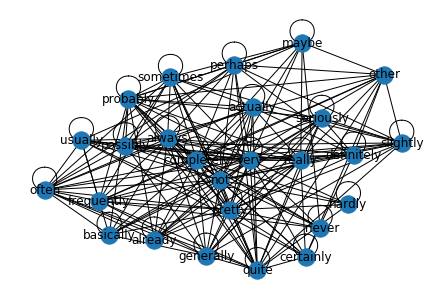

In [338]:
nx.draw(G, with_labels = True)

In [394]:
from networkx.algorithms.community.centrality import girvan_newman
clusters = girvan_newman(G)
list(clusters)[1]

({'actually',
  'already',
  'always',
  'basically',
  'certainly',
  'completely',
  'definitely',
  'frequently',
  'generally',
  'maybe',
  'not',
  'often',
  'other',
  'perhaps',
  'possibly',
  'pretty',
  'probably',
  'quite',
  'really',
  'seriously',
  'slightly',
  'sometimes',
  'usually',
  'very'},
 {' never'},
 {'hardly'})

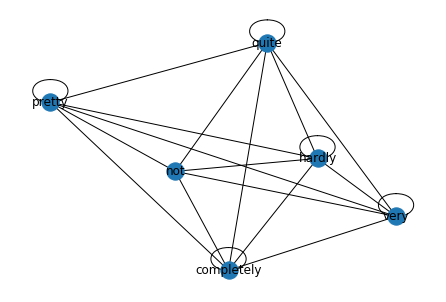

In [342]:
n = [i for i in G.neighbors('hardly')]
G2 = G.subgraph(n)
nx.draw(G2, with_labels = True, pos = nx.spring_layout(G2))

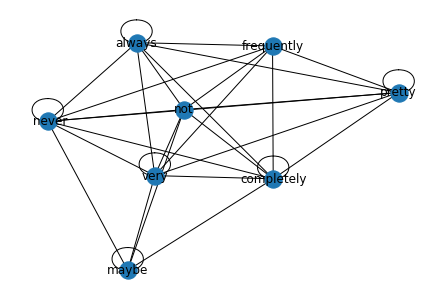

In [343]:
n = [i for i in G.neighbors(' never')]
G2 = G.subgraph(n)
nx.draw(G2, with_labels = True, pos = nx.spring_layout(G2))

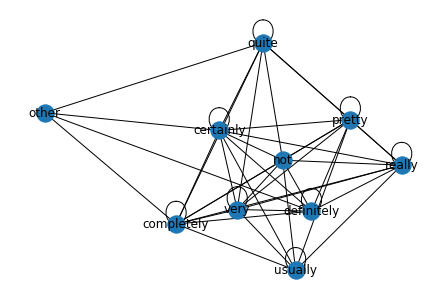

In [345]:
n = [i for i in G.neighbors('certainly')]
G2 = G.subgraph(n)
nx.draw(G2, with_labels = True, pos = nx.spring_layout(G2))

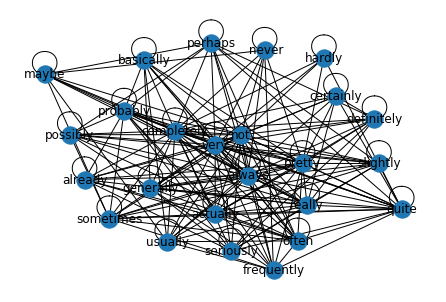

In [346]:
n = [i for i in G.neighbors('very')]
G2 = G.subgraph(n)
nx.draw(G2, with_labels = True, pos = nx.spring_layout(G2))

In [347]:
threshold = 5
G_5 = nx.Graph(((source, target, attr) for source, target, attr in G.edges(data=True) if attr['weight'] > threshold))

In [348]:
# maybe is the only item not often confused with 'not'
# as expected, 'never' and 'hardly' are the most often confused with 'not'
# so we get it for NPIs, but otherwise no..?
[(s,t,a) for s,t,a in G.edges(data=True) if a['weight'] > threshold]

[('other', 'maybe', {'weight': 8.0}),
 (' never', 'very', {'weight': 7.0}),
 (' never', 'not', {'weight': 22.0}),
 ('sometimes', 'very', {'weight': 9.0}),
 ('sometimes', 'not', {'weight': 10.0}),
 ('already', 'very', {'weight': 10.0}),
 ('already', 'not', {'weight': 13.0}),
 ('often', 'often', {'weight': 6.0}),
 ('often', 'not', {'weight': 12.0}),
 ('often', 'frequently', {'weight': 8.0}),
 ('generally', 'very', {'weight': 10.0}),
 ('generally', 'not', {'weight': 11.0}),
 ('usually', 'very', {'weight': 8.0}),
 ('usually', 'completely', {'weight': 7.0}),
 ('usually', 'not', {'weight': 6.0}),
 ('frequently', 'very', {'weight': 6.0}),
 ('frequently', 'not', {'weight': 10.0}),
 ('always', 'always', {'weight': 7.0}),
 ('always', 'not', {'weight': 15.0}),
 ('maybe', 'maybe', {'weight': 8.0}),
 ('maybe', 'very', {'weight': 7.0}),
 ('perhaps', 'very', {'weight': 8.0}),
 ('perhaps', 'completely', {'weight': 6.0}),
 ('perhaps', 'not', {'weight': 7.0}),
 ('possibly', 'very', {'weight': 12.0}),
 (

In [349]:
# these are the ones > 5 confusions, without 'very' and 'not' frequent items 
[(s,t,a) for s,t,a in G.edges(data=True) if a['weight'] > threshold and not (any(i in ['very', 'not'] for i in [s,t]))]

[('other', 'maybe', {'weight': 8.0}),
 ('often', 'often', {'weight': 6.0}),
 ('often', 'frequently', {'weight': 8.0}),
 ('usually', 'completely', {'weight': 7.0}),
 ('always', 'always', {'weight': 7.0}),
 ('maybe', 'maybe', {'weight': 8.0}),
 ('perhaps', 'completely', {'weight': 6.0}),
 ('possibly', 'completely', {'weight': 7.0}),
 ('probably', 'completely', {'weight': 7.0}),
 ('actually', 'really', {'weight': 7.0}),
 ('really', 'really', {'weight': 9.0}),
 ('really', 'pretty', {'weight': 8.0}),
 ('really', 'seriously', {'weight': 11.0}),
 ('really', 'slightly', {'weight': 8.0}),
 ('basically', 'completely', {'weight': 15.0}),
 ('seriously', 'completely', {'weight': 7.0}),
 ('completely', 'completely', {'weight': 19.0})]

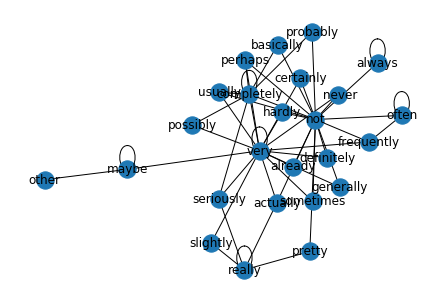

In [350]:
# we can see clearly that 'not' and 'very' dominate confusion because of frequency
# items with loops are more correct (confused with themselves > 5 times). They are also frequent lexemes
nx.draw(G_5, with_labels = True)

In [352]:
clusters_5 = girvan_newman(G_5)
list(clusters_5)[2]

({'maybe', 'other'},
 {' never',
  'actually',
  'already',
  'basically',
  'certainly',
  'completely',
  'definitely',
  'frequently',
  'generally',
  'hardly',
  'not',
  'often',
  'perhaps',
  'possibly',
  'probably',
  'seriously',
  'sometimes',
  'usually',
  'very'},
 {'always'},
 {'pretty', 'really', 'slightly'})

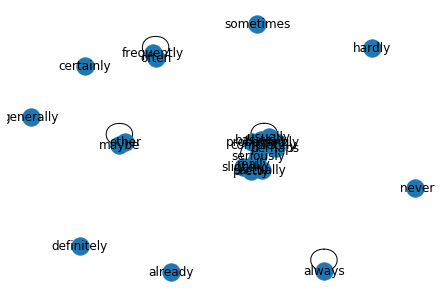

In [353]:
# without 'not' and 'very'
G_5.remove_nodes_from(['very', 'not'])
nx.draw(G_5, with_labels = True)

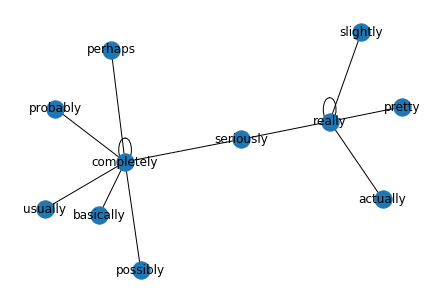

In [354]:
# remove nodes that are separate from main cluster or have no edges
G_5.remove_nodes_from(['always', 'hardly', 'certainly', 'generally', 'often', 
                       'other', 'maybe','frequently',
                      'already', ' never', 'sometimes', 'definitely'])
nx.draw(G_5, with_labels = True)
# again we have frequency effects (really and completely have 0.2 accuracy in neutral context)
# however, seriously does not. So maybe confused with really and completely because of semantics
# given really and completely have // frequency, there does seem to be a preferential effect
# ie, some intensifiers are more likely to be confused with 'really', others with 'completely'
# but this is opposite of what my categories would have predicted (really being epistemic, completely being neutral)
# on the contrary, we get 4 epistemic adv often confused with 'completely' which is neutral
# and only one epistemic adv (actually) confused with 'really', which is (originally) epistemic

In [355]:
edge_labels = nx.get_edge_attributes(G_5,'weight')
edge_labels

{('usually', 'completely'): 7.0,
 ('completely', 'perhaps'): 6.0,
 ('completely', 'possibly'): 7.0,
 ('completely', 'probably'): 7.0,
 ('completely', 'basically'): 15.0,
 ('completely', 'seriously'): 7.0,
 ('completely', 'completely'): 19.0,
 ('actually', 'really'): 7.0,
 ('really', 'really'): 9.0,
 ('really', 'pretty'): 8.0,
 ('really', 'seriously'): 11.0,
 ('really', 'slightly'): 8.0}

In [356]:
clusters_5_cleaned = girvan_newman(G_5)
list(clusters_5_cleaned)[0]
# the algorithm has a much easier time here

({'basically', 'completely', 'perhaps', 'possibly', 'probably', 'usually'},
 {'actually', 'pretty', 'really', 'seriously', 'slightly'})

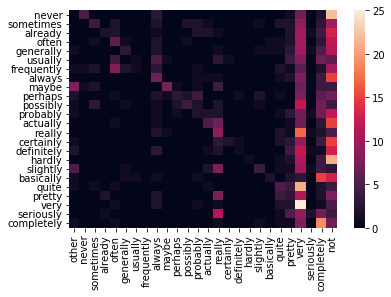

In [357]:
# large
import seaborn as sns
ax = sns.heatmap(confusion_matrix, 
            yticklabels = deg_adv,
            xticklabels = deg_adv_other_not)
# interestingly 'really' gets a boost from context but lots of errors

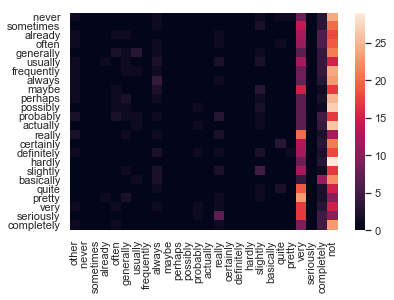

In [420]:
# large neutral context 
ax = sns.heatmap(confusion_matrix, 
            yticklabels = deg_adv,
            xticklabels = deg_adv_other_not)

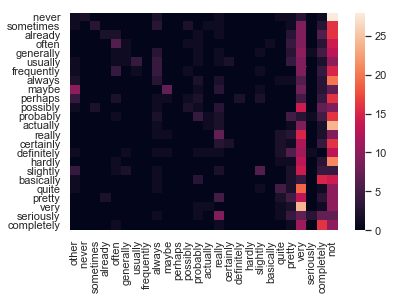

In [422]:
# base
ax = sns.heatmap(confusion_matrix, 
            yticklabels = deg_adv,
            xticklabels = deg_adv_other_not)

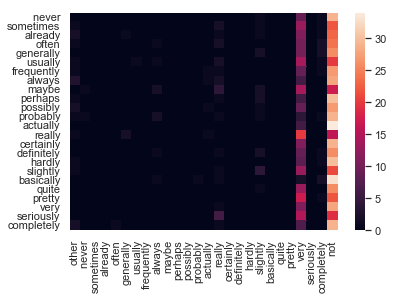

In [424]:
# base neutral
ax = sns.heatmap(confusion_matrix, 
            yticklabels = deg_adv,
            xticklabels = deg_adv_other_not)

In [370]:
df_neut_neg['adv_exp'] = df_neut_neg['adv_exp'].apply(lambda x: str(x))

In [371]:
# some analyses!
# is the prediction of original ADV higher than 'NOT'?
# where are ADV and NOT ranked in the neutral context?
# also, is correct pred in top 10?
accuracies_large = {}
accuracies_large_neut = {}
accuracies_base = {}
accuracies_base_neut = {}


MRR_large = {}
MRR_large_neut = {}
MRR_base = {}
MRR_base_neut = {}

diff_large = {}
diff_large_neut = {}
diff_base = {}
diff_base_neut = {}


for adv in deg_adv:
    accuracies_large[adv] = 0
    accuracies_large_neut[adv] = 0
    accuracies_base[adv] = 0
    accuracies_base_neut[adv] = 0
    
    MRR_large[adv] = 0
    MRR_large_neut[adv] = 0
    MRR_base[adv] = 0
    MRR_base_neut[adv] = 0

    diff_large[adv] = 0
    diff_large_neut[adv] = 0
    diff_base[adv] = 0
    diff_base_neut[adv] = 0

for adv in deg_adv:
    print(adv)
    df_adv = df_neut_neg[df_neut_neg['adv_exp'].str.contains(f"'{adv}'")]
    for i, p_l in enumerate(df_adv['adv_preds']):
        print('I', i)
        n_l = df_adv['neutral_preds'].iloc[i]
        p_b = df_adv['adv_preds_base'].iloc[i]
        n_b = df_adv['neutral_preds_base'].iloc[i]

        neg_rank_large = p_l[0][0]
        adv_rank_large = p_l[1][0]
        MRR_large[adv] += 1/(adv_rank_large+1)
        diff_large[adv] += adv_rank_large-neg_rank_large
        if adv_rank_large < neg_rank_large:
            accuracies_large[adv]+=1
            
        neg_rank_large_neut = n_l[0][0]
        adv_rank_large_neut = n_l[1][0]
        MRR_large_neut[adv] += 1/(adv_rank_large_neut+1)
        diff_large_neut[adv] += adv_rank_large_neut-neg_rank_large_neut
        if adv_rank_large_neut < neg_rank_large_neut:
            accuracies_large_neut[adv]+=1
            
        neg_rank_base = p_b[0][0]
        adv_rank_base = p_b[1][0]
        MRR_base[adv] += 1/(adv_rank_base+1)
        diff_base[adv] += adv_rank_base-neg_rank_base
        if adv_rank_base < neg_rank_base:
            accuracies_base[adv]+=1
        
        
        neg_rank_base_neut = n_b[0][0]
        adv_rank_base_neut = n_b[1][0]
        MRR_base_neut[adv] += 1/(adv_rank_base_neut+1)
        diff_base_neut[adv] += adv_rank_base_neut-neg_rank_base_neut
        if adv_rank_base_neut < neg_rank_base_neut:
            accuracies_base_neut[adv]+=1


 never
I 0
I 1
I 2
I 3
I 4
I 5
I 6
I 7
I 8
I 9
I 10
I 11
I 12
I 13
I 14
I 15
I 16
I 17
I 18
I 19
I 20
I 21
I 22
I 23
I 24
I 25
I 26
I 27
I 28
I 29
I 30
I 31
I 32
I 33
I 34
I 35
I 36
I 37
I 38
I 39
sometimes
I 0
I 1
I 2
I 3
I 4
I 5
I 6
I 7
I 8
I 9
I 10
I 11
I 12
I 13
I 14
I 15
I 16
I 17
I 18
I 19
I 20
I 21
I 22
I 23
I 24
I 25
I 26
I 27
I 28
I 29
I 30
I 31
I 32
I 33
I 34
I 35
I 36
I 37
I 38
I 39
already
I 0
I 1
I 2
I 3
I 4
I 5
I 6
I 7
I 8
I 9
I 10
I 11
I 12
I 13
I 14
I 15
I 16
I 17
I 18
I 19
I 20
I 21
I 22
I 23
I 24
I 25
I 26
I 27
I 28
I 29
I 30
I 31
I 32
I 33
I 34
I 35
I 36
I 37
I 38
I 39
often
I 0
I 1
I 2
I 3
I 4
I 5
I 6
I 7
I 8
I 9
I 10
I 11
I 12
I 13
I 14
I 15
I 16
I 17
I 18
I 19
I 20
I 21
I 22
I 23
I 24
I 25
I 26
I 27
I 28
I 29
I 30
I 31
I 32
I 33
I 34
I 35
I 36
I 37
I 38
I 39
generally
I 0
I 1
I 2
I 3
I 4
I 5
I 6
I 7
I 8
I 9
I 10
I 11
I 12
I 13
I 14
I 15
I 16
I 17
I 18
I 19
I 20
I 21
I 22
I 23
I 24
I 25
I 26
I 27
I 28
I 29
I 30
I 31
I 32
I 33
I 34
I 35
I 36
I 37
I 38
I 39
usually
I

In [325]:
from scipy import stats
# the smaller the rank, the more negative the diff, the better!! 
d_l = {}

for v in accuracies_large:
    d_l[v] ={'acc': 0, 'MRR': 0, 'diff': 0}
    d_l[v]['acc'] = accuracies_large[v]/40
    d_l[v]['MRR'] = MRR_large[v]/40
    d_l[v]['diff'] = diff_large[v]/40
print('OTHER')
other_l = sorted({k:v for k, v in d_l.items() if k in other}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(other_l)
print('FACTUAL')
factual_l = sorted({k:v for k, v in d_l.items() if k in factual}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(factual_l)
print('TEMPORAL')
temporal_l = sorted({k:v for k, v in d_l.items() if k in temporal}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(temporal_l)

print('average accuracy: ', sum([accuracies_large[v]/40 for v in accuracies_large])/24)
print('average MRR: ', sum([MRR_large[v]/40 for v in MRR_large])/24)
print('average diff: ', sum([diff_large[v]/40 for v in diff_large])/24)

so_l = sorted({k:v for k, v in accuracies_large.items() if k in other}.items(), key = lambda k:k[1])
sf_l = sorted({k:v for k, v in accuracies_large.items() if k in factual}.items(), key = lambda k:k[1])
st_l = sorted({k:v for k, v in accuracies_large.items() if k in temporal}.items(), key = lambda k:k[1])

# how much ease of prediction correlates with intensity?
print(stats.spearmanr(list(range(8)),[other.index(k[0]) for k in so_l]))
print(stats.spearmanr(list(range(8)),[factual.index(k[0]) for k in sf_l]))
print(stats.spearmanr(list(range(8)),[temporal.index(k[0]) for k in st_l]))

# how much accuracy in context correlates with accuracy without context?
# d1 = {}
# for v in d_l:
#     d1[v] = (d_l[v]['acc']-d_ln[v]['acc'])

# print('OTHER')
# print(sorted({k:v for k, v in d1.items() if k in other}.items(), key = lambda k:k[1], reverse=True))
# print('FACTUAL')
# print(sorted({k:v for k, v in d1.items() if k in factual}.items(), key = lambda k:k[1], reverse=True))
# print('TEMPORAL')
# print(sorted({k:v for k, v in d1.items() if k in temporal}.items(), key = lambda k:k[1], reverse=True))
print('acc_other', np.mean([i[1]['acc'] for i in other_l]))
print('MRR_other', np.mean([i[1]['MRR'] for i in other_l]))
print('diff_other', np.mean([i[1]['diff'] for i in other_l]))
print('acc_factual', np.mean([i[1]['acc'] for i in factual_l]))
print('MRR_factual', np.mean([i[1]['MRR'] for i in factual_l]))
print('diff_factual', np.mean([i[1]['diff'] for i in factual_l]))
print('acc_temporal', np.mean([i[1]['acc'] for i in temporal_l]))
print('MRR_temporal', np.mean([i[1]['MRR'] for i in temporal_l]))
print('diff_temporal', np.mean([i[1]['diff'] for i in temporal_l]))

OTHER
[('very', {'acc': 0.725, 'MRR': 0.5503681016980435, 'diff': -22.425}), ('pretty', {'acc': 0.625, 'MRR': 0.19027027367998, 'diff': -16.8}), ('completely', {'acc': 0.55, 'MRR': 0.3949152405912109, 'diff': -4.7}), ('slightly', {'acc': 0.525, 'MRR': 0.09381856332307728, 'diff': -9.5}), ('quite', {'acc': 0.5, 'MRR': 0.2594916616158157, 'diff': 14.375}), ('seriously', {'acc': 0.4, 'MRR': 0.09616571616212585, 'diff': 53.825}), ('basically', {'acc': 0.25, 'MRR': 0.07400610369280741, 'diff': 15.175}), ('hardly', {'acc': 0.025, 'MRR': 0.0840489540439977, 'diff': 44.375})]
FACTUAL
[('really', {'acc': 0.725, 'MRR': 0.24820748440023116, 'diff': -21.85}), ('possibly', {'acc': 0.5, 'MRR': 0.12651156825159232, 'diff': 32.7}), ('maybe', {'acc': 0.425, 'MRR': 0.16357214371018916, 'diff': 84.9}), ('probably', {'acc': 0.4, 'MRR': 0.10214808630050005, 'diff': 2.175}), ('actually', {'acc': 0.35, 'MRR': 0.18352471606611626, 'diff': 5.9}), ('perhaps', {'acc': 0.275, 'MRR': 0.06421658869360565, 'diff': 4

In [589]:
o_l = [i[1]['acc'] for i in sorted(other_l, key = lambda k : other.index(k[0]))]
o_ln = [i[1]['acc'] for i in sorted(other_ln, key = lambda k : other.index(k[0]))]
o_b = [i[1]['acc'] for i in sorted(other_b, key = lambda k : other.index(k[0]))]
o_bn = [i[1]['acc'] for i in sorted(other_bn, key = lambda k : other.index(k[0]))]

In [591]:
f_l = [i[1]['acc'] for i in sorted(factual_l, key = lambda k : factual.index(k[0]))]
f_ln = [i[1]['acc'] for i in sorted(factual_ln, key = lambda k : factual.index(k[0]))]
f_b = [i[1]['acc'] for i in sorted(factual_b, key = lambda k : factual.index(k[0]))]
f_bn = [i[1]['acc'] for i in sorted(factual_bn, key = lambda k : factual.index(k[0]))]

In [592]:
t_l = [i[1]['acc'] for i in sorted(temporal_l, key = lambda k : temporal.index(k[0]))]
t_ln = [i[1]['acc'] for i in sorted(temporal_ln, key = lambda k : temporal.index(k[0]))]
t_b = [i[1]['acc'] for i in sorted(temporal_b, key = lambda k : temporal.index(k[0]))]
t_bn = [i[1]['acc'] for i in sorted(temporal_bn, key = lambda k : temporal.index(k[0]))]

In [593]:
sorted(factual_l, key = lambda k : factual.index(k[0]))

[('maybe', {'acc': 0.425, 'MRR': 0.17798012299117322, 'diff': 85.525}),
 ('perhaps', {'acc': 0.3, 'MRR': 0.07295024532915471, 'diff': 30.6}),
 ('possibly', {'acc': 0.5, 'MRR': 0.1393395411264657, 'diff': -0.275}),
 ('probably', {'acc': 0.425, 'MRR': 0.10842147925002935, 'diff': 0.675}),
 ('actually', {'acc': 0.35, 'MRR': 0.18561635450014596, 'diff': 4.15}),
 ('really', {'acc': 0.75, 'MRR': 0.252612246304993, 'diff': -22.35}),
 ('certainly', {'acc': 0.225, 'MRR': 0.12895488539147126, 'diff': 18.0}),
 ('definitely', {'acc': 0.25, 'MRR': 0.09192207930211801, 'diff': 54.4})]

In [594]:
sorted(other_l, key = lambda k : other.index(k[0]))

[('hardly', {'acc': 0.025, 'MRR': 0.0840489540439977, 'diff': 44.375}),
 ('slightly', {'acc': 0.525, 'MRR': 0.09381856332307728, 'diff': -9.5}),
 ('basically', {'acc': 0.25, 'MRR': 0.0741449925816963, 'diff': 15.125}),
 ('quite', {'acc': 0.5, 'MRR': 0.2594916616158157, 'diff': 14.375}),
 ('pretty', {'acc': 0.625, 'MRR': 0.19027027367998, 'diff': -16.8}),
 ('very', {'acc': 0.725, 'MRR': 0.5503681016980435, 'diff': -22.425}),
 ('seriously', {'acc': 0.4, 'MRR': 0.09616571616212585, 'diff': 53.825}),
 ('completely', {'acc': 0.55, 'MRR': 0.3949152405912109, 'diff': -4.7})]

In [595]:
sorted(temporal_l, key = lambda k : temporal.index(k[0]))

[(' never', {'acc': 0.175, 'MRR': 0.2439685881719519, 'diff': 9.475}),
 ('sometimes', {'acc': 0.6, 'MRR': 0.21027606726988926, 'diff': -17.325}),
 ('already', {'acc': 0.25, 'MRR': 0.10394510490659876, 'diff': 19.775}),
 ('often', {'acc': 0.375, 'MRR': 0.2246035634610713, 'diff': -2.15}),
 ('generally', {'acc': 0.325, 'MRR': 0.11205620455262089, 'diff': 1.275}),
 ('usually', {'acc': 0.4, 'MRR': 0.10998662371394789, 'diff': 1.325}),
 ('frequently', {'acc': 0.25, 'MRR': 0.03144001791732643, 'diff': 91.375}),
 ('always', {'acc': 0.4, 'MRR': 0.26357151952105967, 'diff': 8.75})]

In [596]:
o_concat = np.concatenate(([o_l], [o_ln], [o_b], [o_bn]))
f_concat = np.concatenate(([f_l], [f_ln], [f_b], [f_bn]))
t_concat = np.concatenate(([t_l], [t_ln], [t_b], [t_bn]))
o_diff = np.concatenate(([np.array(o_l)-np.array(o_ln)], [np.array(o_b)-np.array(o_bn)]))
f_diff = np.concatenate(([np.array(f_l)-np.array(f_ln)], [np.array(f_b)-np.array(f_bn)]))
t_diff = np.concatenate(([np.array(t_l)-np.array(t_ln)], [np.array(t_b)-np.array(t_bn)]))

In [601]:
other_l

[('very', {'acc': 0.725, 'MRR': 0.5503681016980435, 'diff': -22.425}),
 ('pretty', {'acc': 0.625, 'MRR': 0.19027027367998, 'diff': -16.8}),
 ('completely', {'acc': 0.55, 'MRR': 0.3949152405912109, 'diff': -4.7}),
 ('slightly', {'acc': 0.525, 'MRR': 0.09381856332307728, 'diff': -9.5}),
 ('quite', {'acc': 0.5, 'MRR': 0.2594916616158157, 'diff': 14.375}),
 ('seriously', {'acc': 0.4, 'MRR': 0.09616571616212585, 'diff': 53.825}),
 ('basically', {'acc': 0.25, 'MRR': 0.0741449925816963, 'diff': 15.125}),
 ('hardly', {'acc': 0.025, 'MRR': 0.0840489540439977, 'diff': 44.375})]

In [608]:
o_l

[0.025, 0.525, 0.25, 0.5, 0.625, 0.725, 0.4, 0.55]

In [606]:
other

['hardly',
 'slightly',
 'basically',
 'quite',
 'pretty',
 'very',
 'seriously',
 'completely']

In [605]:
o_ln

[0.0, 0.225, 0.0, 0.3, 0.1, 0.5, 0.05, 0.2]

In [603]:
other_ln

[('very', {'acc': 0.5, 'MRR': 0.49838452911822495, 'diff': 2.525}),
 ('quite', {'acc': 0.3, 'MRR': 0.2700101310910062, 'diff': 6.975}),
 ('slightly', {'acc': 0.225, 'MRR': 0.16781080616087968, 'diff': 42.375}),
 ('completely', {'acc': 0.2, 'MRR': 0.30372608307662763, 'diff': 68.075}),
 ('pretty', {'acc': 0.1, 'MRR': 0.09395506584225158, 'diff': 115.05}),
 ('seriously', {'acc': 0.05, 'MRR': 0.03864641646875203, 'diff': 84.675}),
 ('hardly', {'acc': 0.0, 'MRR': 0.015492732164961562, 'diff': 198.35}),
 ('basically', {'acc': 0.0, 'MRR': 0.04656455541174136, 'diff': 83.95})]

In [610]:
factual

['maybe',
 'perhaps',
 'possibly',
 'probably',
 'actually',
 'really',
 'certainly',
 'definitely']

In [611]:
temporal

[' never',
 'sometimes',
 'already',
 'often',
 'generally',
 'usually',
 'frequently',
 'always']

In [597]:
o_diff # hardly gets smallest boost, 'pretty' for BERT large and 'completely' for BERT base

array([[0.025, 0.3  , 0.25 , 0.2  , 0.525, 0.225, 0.35 , 0.35 ],
       [0.   , 0.325, 0.1  , 0.3  , 0.4  , 0.3  , 0.275, 0.425]])

In [598]:
f_diff # top adv 'certainly', 'definitely' get smallest boost, 'possibly' gets highest
# for BERT base: 

array([[0.425, 0.3  , 0.475, 0.4  , 0.35 , 0.5  , 0.225, 0.225],
       [0.375, 0.2  , 0.35 , 0.25 , 0.1  , 0.525, 0.1  , 0.125]])

In [599]:
t_diff # never is small as expected, otherwise 'sometimes' gets most boost 

array([[0.175, 0.6  , 0.225, 0.3  , 0.2  , 0.275, 0.25 , 0.275],
       [0.1  , 0.325, 0.175, 0.325, 0.15 , 0.2  , 0.1  , 0.225]])

[Text(0.5, 1.0, 'Fig. 1: Accuracies of models for adverb category "neutral"')]

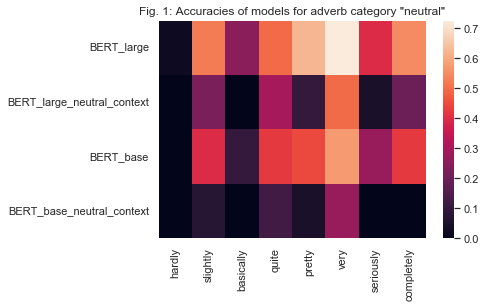

In [341]:
# heatmaps
import numpy as np
import seaborn as sns
sns.set_theme()

# 'other' category isn't bad
# but you can see for BERT large the neutral context seems like it already contains information/biases
# (simply means these are frequent adverbs?) (should check the DIFFERENCE in accuracy..?)
labels_o = [i[0] for i in sorted(other_l, key = lambda k : other.index(k[0]))]
models = ['BERT_large', 'BERT_large_neutral_context', 'BERT_base', 'BERT_base_neutral_context']

plot_other = sns.heatmap(o_concat, 
            yticklabels = models,
            xticklabels = labels_o)
plot_other.set(title = 'Fig. 1: Accuracies of models for adverb category "NEUTRAL"')


[Text(0.5, 1.0, 'Difference in accuracies for adverb category "OTHER"')]

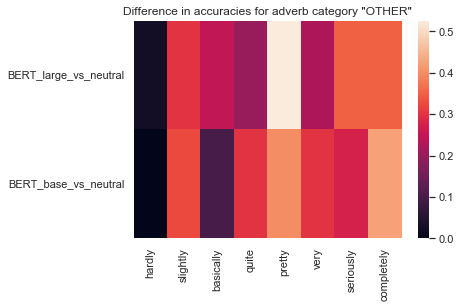

In [346]:
# BERT base does actually better..? (memorise frequency less, more influence of context?)
plot_other_diff = sns.heatmap(o_diff, 
            yticklabels = ['BERT_large_vs_neutral', 'BERT_base_vs_neutral'],
            xticklabels = labels_o)
plot_other_diff.set(title = 'Difference in accuracies for adverb category "OTHER"')

[Text(0.5, 1.0, 'Difference in accuracies for adverb category "EPISTEMIC"')]

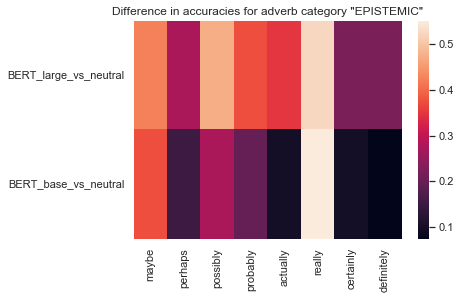

In [347]:
# factual seems reversed..?!
plot_factual_diff = sns.heatmap(f_diff, 
            yticklabels = ['BERT_large_vs_neutral', 'BERT_base_vs_neutral'],
            xticklabels = labels_f)
plot_factual_diff.set(title = 'Difference in accuracies for adverb category "EPISTEMIC"')

In [314]:
f_diff

array([[0.425, 0.275, 0.475, 0.375, 0.35 , 0.525, 0.225, 0.225],
       [0.375, 0.15 , 0.275, 0.2  , 0.1  , 0.55 , 0.1  , 0.075]])

[Text(0.5, 1.0, 'Difference in accuracies for adverb category "TEMPORAL"')]

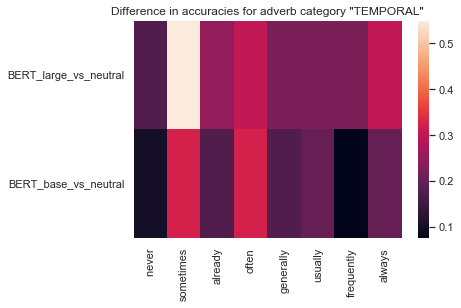

In [349]:
# temporal is actually really bad...
plot_temporal_diff = sns.heatmap(t_diff, 
            yticklabels = ['BERT_large_vs_neutral', 'BERT_base_vs_neutral'],
            xticklabels = labels_t)
plot_temporal_diff.set(title = 'Difference in accuracies for adverb category "TEMPORAL"')

In [305]:
o_concat

array([[0.025, 0.525, 0.25 , 0.5  , 0.625, 0.725, 0.4  , 0.55 ],
       [0.   , 0.225, 0.   , 0.3  , 0.1  , 0.5  , 0.05 , 0.2  ],
       [0.   , 0.4  , 0.1  , 0.425, 0.45 , 0.575, 0.275, 0.425],
       [0.   , 0.075, 0.   , 0.125, 0.05 , 0.275, 0.   , 0.   ]])

In [300]:
o_diff

array([[0.025, 0.3  , 0.25 , 0.2  , 0.525, 0.225, 0.35 , 0.35 ],
       [0.   , 0.325, 0.1  , 0.3  , 0.4  , 0.3  , 0.275, 0.425]])

In [297]:
np.array(o_b)-np.array(o_bn)

array([0.   , 0.325, 0.1  , 0.3  , 0.4  , 0.3  , 0.275, 0.425])

In [298]:
o_b

[0.0, 0.4, 0.1, 0.425, 0.45, 0.575, 0.275, 0.425]

In [299]:
o_bn

[0.0, 0.075, 0.0, 0.125, 0.05, 0.275, 0.0, 0.0]

[Text(0.5, 1.0, 'Fig. 1: Accuracies of models for adverb category "EPISTEMIC"')]

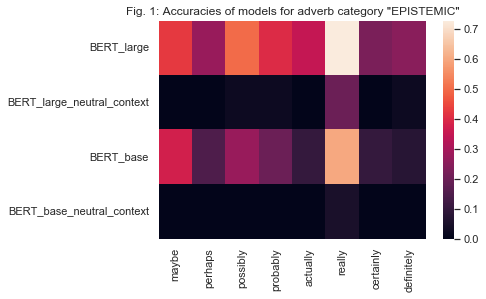

In [342]:
# factual category is pretty bad
# in this case there is little effect of base frequency apart from 'really'
labels_f = [i[0] for i in sorted(factual_l, key = lambda k : factual.index(k[0]))]

plot_factual = sns.heatmap(f_concat, 
            yticklabels = models,
            xticklabels = labels_f)
plot_factual.set(title = 'Fig. 1: Accuracies of models for adverb category "EPISTEMIC"')

[Text(0.5, 1.0, 'Fig. 1: Accuracies of models for adverb category "TEMPORAL"')]

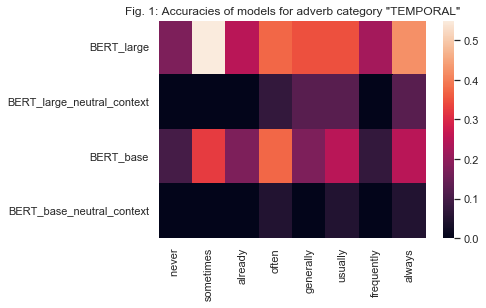

In [344]:
# tenmporal category is ok
labels_t = [i[0] for i in sorted(temporal_l, key = lambda k : temporal.index(k[0]))]

plot_temporal = sns.heatmap(t_concat, 
            yticklabels = models,
            xticklabels = labels_t)
plot_temporal.set(title = 'Fig. 1: Accuracies of models for adverb category "TEMPORAL"')

In [326]:
d_ln  = {}
for v in accuracies_large_neut:
    d_ln[v] ={'acc': 0, 'MRR': 0, 'diff': 0}
    d_ln[v]['acc'] = accuracies_large_neut[v]/40
    d_ln[v]['MRR'] = MRR_large_neut[v]/40
    d_ln[v]['diff'] = diff_large_neut[v]/40
print('OTHER')
other_ln = sorted({k:v for k, v in d_ln.items() if k in other}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(other_ln)
print('FACTUAL')
factual_ln = sorted({k:v for k, v in d_ln.items() if k in factual}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(factual_ln)
print('TEMPORAL')
temporal_ln = sorted({k:v for k, v in d_ln.items() if k in temporal}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(temporal_ln)

print('average accuracy: ', sum([accuracies_large_neut[v]/40 for v in accuracies_large_neut])/24)
print('average MRR: ', sum([MRR_large_neut[v]/40 for v in MRR_large_neut])/24)
print('average diff: ', sum([diff_large_neut[v]/40 for v in diff_large_neut])/24)

so = sorted({k:v for k, v in accuracies_large_neut.items() if k in other}.items(), key = lambda k:k[1])
sf = sorted({k:v for k, v in accuracies_large_neut.items() if k in factual}.items(), key = lambda k:k[1])
st = sorted({k:v for k, v in accuracies_large_neut.items() if k in temporal}.items(), key = lambda k:k[1])

print(stats.spearmanr(list(range(8)),[other.index(k[0]) for k in so]))
print(stats.spearmanr(list(range(8)),[factual.index(k[0]) for k in sf]))
print(stats.spearmanr(list(range(8)),[temporal.index(k[0]) for k in st]))

print('acc_other', np.mean([i[1]['acc'] for i in other_ln]))
print('MRR_other', np.mean([i[1]['MRR'] for i in other_ln]))
print('diff_other', np.mean([i[1]['diff'] for i in other_ln]))
print('acc_factual', np.mean([i[1]['acc'] for i in factual_ln]))
print('MRR_factual', np.mean([i[1]['MRR'] for i in factual_ln]))
print('diff_factual', np.mean([i[1]['diff'] for i in factual_ln]))
print('acc_temporal', np.mean([i[1]['acc'] for i in temporal_ln]))
print('MRR_temporal', np.mean([i[1]['MRR'] for i in temporal_ln]))
print('diff_temporal', np.mean([i[1]['diff'] for i in temporal_ln]))


OTHER
[('very', {'acc': 0.5, 'MRR': 0.49838452911822495, 'diff': 2.525}), ('quite', {'acc': 0.3, 'MRR': 0.2700101310910062, 'diff': 6.975}), ('slightly', {'acc': 0.225, 'MRR': 0.16781080616087968, 'diff': 42.375}), ('completely', {'acc': 0.2, 'MRR': 0.30372608307662763, 'diff': 68.075}), ('pretty', {'acc': 0.1, 'MRR': 0.09395506584225158, 'diff': 115.05}), ('seriously', {'acc': 0.05, 'MRR': 0.03864641646875203, 'diff': 84.675}), ('hardly', {'acc': 0.0, 'MRR': 0.015492732164961562, 'diff': 198.35}), ('basically', {'acc': 0.0, 'MRR': 0.04636995834214429, 'diff': 84.225})]
FACTUAL
[('really', {'acc': 0.2, 'MRR': 0.11419629091226444, 'diff': 79.0}), ('possibly', {'acc': 0.025, 'MRR': 0.016014851224406195, 'diff': 145.875}), ('probably', {'acc': 0.025, 'MRR': 0.030553631717904144, 'diff': 117.9}), ('definitely', {'acc': 0.025, 'MRR': 0.018697504192044034, 'diff': 236.3}), ('maybe', {'acc': 0.0, 'MRR': 0.002592361280454097, 'diff': 1000.275}), ('perhaps', {'acc': 0.0, 'MRR': 0.00701357625707

In [392]:
d_b = {}
for v in accuracies_base:
    d_b[v] ={'acc': 0, 'MRR': 0, 'diff': 0}
    d_b[v]['acc'] = accuracies_base[v]/40
    d_b[v]['MRR'] = MRR_base[v]/40
    d_b[v]['diff'] = diff_base[v]/40
print('OTHER')
other_b = sorted({k:v for k, v in d_b.items() if k in other}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(other_b)
print('FACTUAL')
factual_b = sorted({k:v for k, v in d_b.items() if k in factual}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(factual_b)
print('TEMPORAL')
temporal_b = sorted({k:v for k, v in d_b.items() if k in temporal}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(temporal_b)

print('average accuracy: ', sum([accuracies_base[v]/40 for v in accuracies_base])/24)
print('average MRR: ', sum([MRR_base[v]/40 for v in MRR_base])/24)
print('average diff: ', sum([diff_base[v]/40 for v in diff_base])/24)

so = sorted({k:v for k, v in accuracies_base.items() if k in other}.items(), key = lambda k:k[1])
sf = sorted({k:v for k, v in accuracies_base.items() if k in factual}.items(), key = lambda k:k[1])
st = sorted({k:v for k, v in accuracies_base.items() if k in temporal}.items(), key = lambda k:k[1])

print(stats.spearmanr(list(range(8)),[other.index(k[0]) for k in so]))
print(stats.spearmanr(list(range(8)),[factual.index(k[0]) for k in sf]))
print(stats.spearmanr(list(range(8)),[temporal.index(k[0]) for k in st]))

# how much accuracy in context correlates with accuracy without context?
# d2 = {}
# for v in d_l:
#     d2[v] = (d_b[v]['acc']-d_bn[v]['acc'])

# print('OTHER')
# print(sorted({k:v for k, v in d2.items() if k in other}.items(), key = lambda k:k[1], reverse=True))
# print('FACTUAL')
# print(sorted({k:v for k, v in d2.items() if k in factual}.items(), key = lambda k:k[1], reverse=True))
# print('TEMPORAL')
# print(sorted({k:v for k, v in d2.items() if k in temporal}.items(), key = lambda k:k[1], reverse=True))

OTHER
[('very', {'acc': 0.575, 'MRR': 0.5395042186915251, 'diff': -15.025}), ('pretty', {'acc': 0.45, 'MRR': 0.2786096258107855, 'diff': -4.7}), ('quite', {'acc': 0.425, 'MRR': 0.23513170390346216, 'diff': 0.025}), ('completely', {'acc': 0.425, 'MRR': 0.3596614164876743, 'diff': -4.725}), ('slightly', {'acc': 0.4, 'MRR': 0.10236545016306062, 'diff': 64.875}), ('seriously', {'acc': 0.275, 'MRR': 0.14063146362045528, 'diff': 20.45}), ('basically', {'acc': 0.1, 'MRR': 0.04508591700285129, 'diff': 58.575}), ('hardly', {'acc': 0.0, 'MRR': 0.06652947109318198, 'diff': 57.525})]
FACTUAL
[('really', {'acc': 0.575, 'MRR': 0.21777614382905783, 'diff': -13.55}), ('maybe', {'acc': 0.375, 'MRR': 0.17722511228364451, 'diff': 153.1}), ('possibly', {'acc': 0.35, 'MRR': 0.1087389222229358, 'diff': 38.95}), ('probably', {'acc': 0.25, 'MRR': 0.12798159686050084, 'diff': 17.075}), ('perhaps', {'acc': 0.2, 'MRR': 0.0340526266087823, 'diff': 79.175}), ('definitely', {'acc': 0.125, 'MRR': 0.06572477871771476

In [393]:
print('acc_other', np.mean([i[1]['acc'] for i in other_b]))
print('MRR_other', np.mean([i[1]['MRR'] for i in other_b]))
print('diff_other', np.mean([i[1]['diff'] for i in other_b]))
print('acc_factual', np.mean([i[1]['acc'] for i in factual_b]))
print('MRR_factual', np.mean([i[1]['MRR'] for i in factual_b]))
print('diff_factual', np.mean([i[1]['diff'] for i in factual_b]))
print('acc_temporal', np.mean([i[1]['acc'] for i in temporal_b]))
print('MRR_temporal', np.mean([i[1]['MRR'] for i in temporal_b]))
print('diff_temporal', np.mean([i[1]['diff'] for i in temporal_b]))

acc_other 0.33125
MRR_other 0.22093990834662453
diff_other 22.125
acc_factual 0.25937499999999997
MRR_factual 0.11895340011761299
diff_factual 42.671875
acc_temporal 0.225
MRR_temporal 0.11622142945512903
diff_temporal 30.809375000000003


In [390]:
d_bn = {}
for v in accuracies_base_neut:
    d_bn[v] ={'acc': 0, 'MRR': 0, 'diff': 0}
    d_bn[v]['acc'] = accuracies_base_neut[v]/40
    d_bn[v]['MRR'] = MRR_base_neut[v]/40
    d_bn[v]['diff'] = diff_base_neut[v]/40
print('OTHER')
other_bn = sorted({k:v for k, v in d_bn.items() if k in other}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(other_bn)
print('FACTUAL')
factual_bn = sorted({k:v for k, v in d_bn.items() if k in factual}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(factual_bn)
print('TEMPORAL')
temporal_bn = sorted({k:v for k, v in d_bn.items() if k in temporal}.items(), key = lambda k:k[1]['acc'], reverse=True)
print(temporal_bn)

print('average accuracy: ', sum([accuracies_base_neut[v]/40 for v in accuracies_base_neut])/24)
print('average MRR: ', sum([MRR_base_neut[v]/40 for v in MRR_base_neut])/24)
print('average diff: ', sum([diff_base_neut[v]/40 for v in diff_base_neut])/24)

print(sorted({k:v for k, v in accuracies_base_neut.items() if k in other}.items(), key = lambda k:k[1], reverse=True))
print(sorted({k:v for k, v in accuracies_base_neut.items() if k in factual}.items(), key = lambda k:k[1], reverse=True))
print(sorted({k:v for k, v in accuracies_base_neut.items() if k in temporal}.items(), key = lambda k:k[1], reverse=True))

so = sorted({k:v for k, v in accuracies_base_neut.items() if k in other}.items(), key = lambda k:k[1])
sf = sorted({k:v for k, v in accuracies_base_neut.items() if k in factual}.items(), key = lambda k:k[1])
st = sorted({k:v for k, v in accuracies_base_neut.items() if k in temporal}.items(), key = lambda k:k[1])

print(stats.spearmanr(list(range(8)),[other.index(k[0]) for k in so]))
print(stats.spearmanr(list(range(8)),[factual.index(k[0]) for k in sf]))
print(stats.spearmanr(list(range(8)),[temporal.index(k[0]) for k in st]))

OTHER
[('very', {'acc': 0.275, 'MRR': 0.42226665573705047, 'diff': 5.675}), ('quite', {'acc': 0.125, 'MRR': 0.23130700293072368, 'diff': 21.2}), ('slightly', {'acc': 0.075, 'MRR': 0.12517988952674924, 'diff': 62.225}), ('pretty', {'acc': 0.05, 'MRR': 0.07860003934365922, 'diff': 147.875}), ('hardly', {'acc': 0.0, 'MRR': 0.026288121790362533, 'diff': 188.85}), ('basically', {'acc': 0.0, 'MRR': 0.05268267470839207, 'diff': 102.375}), ('seriously', {'acc': 0.0, 'MRR': 0.06182452978802613, 'diff': 90.85}), ('completely', {'acc': 0.0, 'MRR': 0.18724161936818443, 'diff': 141.425})]
FACTUAL
[('really', {'acc': 0.05, 'MRR': 0.08028615131898802, 'diff': 41.3}), ('maybe', {'acc': 0.0, 'MRR': 0.0035619549048439376, 'diff': 878.125}), ('perhaps', {'acc': 0.0, 'MRR': 0.006482799918755366, 'diff': 282.05}), ('possibly', {'acc': 0.0, 'MRR': 0.015929006551753562, 'diff': 175.0}), ('probably', {'acc': 0.0, 'MRR': 0.023382147342592623, 'diff': 103.675}), ('actually', {'acc': 0.0, 'MRR': 0.05225577598621

In [391]:
print('acc_other', np.mean([i[1]['acc'] for i in other_bn]))
print('MRR_other', np.mean([i[1]['MRR'] for i in other_bn]))
print('diff_other', np.mean([i[1]['diff'] for i in other_bn]))
print('acc_factual', np.mean([i[1]['acc'] for i in factual_bn]))
print('MRR_factual', np.mean([i[1]['MRR'] for i in factual_bn]))
print('diff_factual', np.mean([i[1]['diff'] for i in factual_bn]))
print('acc_temporal', np.mean([i[1]['acc'] for i in temporal_bn]))
print('MRR_temporal', np.mean([i[1]['MRR'] for i in temporal_bn]))
print('diff_temporal', np.mean([i[1]['diff'] for i in temporal_bn]))

acc_other 0.065625
MRR_other 0.14817381664914347
diff_other 95.059375
acc_factual 0.00625
MRR_factual 0.02852574760644837
diff_factual 215.921875
acc_temporal 0.025
MRR_temporal 0.049378249683762594
diff_temporal 87.740625


In [ ]:
# RESULTS (accuracy = is original intensifier ADV ranked higher than opposite, ie NOT)
# 1. both models clearly make use of context (LARGE: 0.40 accuracy vs. 0.08, BASE: 0.26 vs. 0.03)
# 2. BERT large does considerably better than BERT base
# 3. Accuracy is still low given this is a fairly conservative test ? but it's hard to know without humans 
#    how many of these are actually predictable
# 4. For the category 'other', correlation between intensity rankings tends to go up with context, 
#    but not for the factual and temporal categories. 
#    ! in neutral context, correlations can't be trusted (mostly zeros)
#    ! none of the models have the expected top and bottom items in the right place
#    (ie, distinguishing more intense items more easily), but predictability may vary across items
# 5. BERT still only above chance for 'very', 'pretty' and 'really'